In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data 
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print("There are ", len(x_train), "images in the training dataset")
y_train[0]

There are  50000 images in the training dataset


array([6], dtype=uint8)

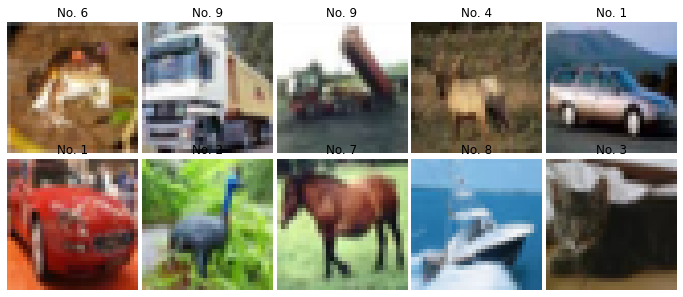

In [ ]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows, num_cols, figsize=(12,5),
                     gridspec_kw={'wspace':0.03, 'hspace':0.01}, 
                     squeeze=True)
for r in range(num_rows):
    for c in range(num_cols):
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( x_train[image_index], cmap='gray')
        ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

In [3]:
x_train=x_train/255
x_test=x_test/255

In [4]:
x=np.concatenate((x_train, x_test), axis=0)
x.shape

(60000, 32, 32, 3)

In [5]:
x_train_flattened = x.reshape(len(x), 32*32*3)

In [6]:
y=np.concatenate((y_train, y_test), axis=0)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = tf.keras.Sequential([               
    tf.keras.layers.Dense(8192, input_shape=(3072,), activation='relu'), 
    tf.keras.layers.Dense(4096, input_shape=(8192,), activation='relu'),
    tf.keras.layers.Dropout(0.2),                         
    tf.keras.layers.Dense(2048, input_shape=(4096,), activation='relu'),
    tf.keras.layers.Dropout(0.175),
    tf.keras.layers.Dense(1024, input_shape=(2048,),activation='relu'),
    tf.keras.layers.Dense(512, input_shape=(1024,),activation='relu'),
    tf.keras.layers.Dropout(0.16),
    tf.keras.layers.Dense(256, input_shape=(512,),activation='relu'),
    tf.keras.layers.Dense(128, input_shape=(256,),activation='relu'),
    tf.keras.layers.Dropout(0.14),
    tf.keras.layers.Dense(64, input_shape=(128,),activation='relu'),
    tf.keras.layers.Dense(32, input_shape=(64,),activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8192)              25174016  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              33558528  
_________________________________________________________________
dropout (Dropout)            (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_4 (Dense)              (None, 512)               5

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train_flattened, y,batch_size=512,epochs=300)

Epoch 1/300
118/118 [==============================] - 7s 56ms/step - loss: 1.6294 - accuracy: 0.4179
Epoch 2/300
118/118 [==============================] - 6s 55ms/step - loss: 1.5769 - accuracy: 0.4375
Epoch 3/300
118/118 [==============================] - 6s 55ms/step - loss: 1.5762 - accuracy: 0.4376
Epoch 4/300
118/118 [==============================] - 7s 55ms/step - loss: 1.5059 - accuracy: 0.4654
Epoch 5/300
118/118 [==============================] - 7s 56ms/step - loss: 1.4914 - accuracy: 0.4691
Epoch 6/300
118/118 [==============================] - 7s 56ms/step - loss: 1.4525 - accuracy: 0.4811
Epoch 7/300
118/118 [==============================] - 7s 56ms/step - loss: 1.4239 - accuracy: 0.4935
Epoch 8/300
118/118 [==============================] - 7s 56ms/step - loss: 1.3959 - accuracy: 0.5045
Epoch 9/300
118/118 [==============================] - 7s 57ms/step - loss: 1.3815 - accuracy: 0.5115
Epoch 10/300
118/118 [==============================] - 7s 57ms/step - loss: 1.357

In [ ]:
y_predict = model.predict(x_train_flattened)
x = y_predict.shape[0]
y_pred = np.ones((60000,1))
for i in range(x):
    y_pred[i] = np.argmax(y_predict[i])
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y)

0.9986666666666667

6


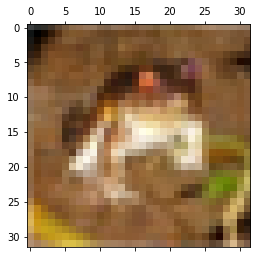

In [ ]:
print(np.argmax(y_predicted[0]))
plt.matshow(x_train[0])

In [12]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")
test_data=test_data/255
test_data.shape
y_predicted = model.predict(test_data)
x = y_predicted.shape[0]
y_pred = np.ones((x,1))
for i in range(x):
  y_pred[i] = np.argmax(y_predicted[i])
df = pd.DataFrame(y_pred)
df.info
df.to_csv('data1.csv')
!cp data.csv "drive/My Drive/"

In [11]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGc0ytpvurktITy7t8Pesku8H-w-tXvMW48vi5cvFBWkW_E_QX0OaE
Mounted at drive
